# Task1 
##Compare the outcomes of different implementations of KDEs.

There are several options available for computing KDE in Python.
- SciPy: gaussian_kde.
- Statsmodels: KDEUnivariate and KDEMultivariate.
- Scikit-learn: KernelDensity.


##1). Generate synthethic data and plot them
Generate synthetic dataset the distribution of which can be presented as a combination of three Gausian distributions with the following parameters: $\mu_1$=1, $\sigma_1$=1 and $\mu_2$=8, $\sigma_2$=2 and $\mu_2$=14, $\sigma_2$=1.5. Generate 1000 samples from the distribution.
<br>
Plot the pdf of this distribution and the generated samples.
<br>
3) Use the generated samples to perform 
- (i) KDE with Scipy, 
- (ii) Univariate KDE with Statsmodels, 
- (iii) Multivariate KDE with Statsmodels as well as 
- (iv) KDE with Scikit-learn.
<br>

4) Plot all four distributions on one figure.  

Citations:
    https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
    https://github.com/statsmodels/statsmodels/blob/master/statsmodels/distributions/mixture_rvs.py

In [1]:
from statsmodels.distributions.mixture_rvs import mixture_rvs
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

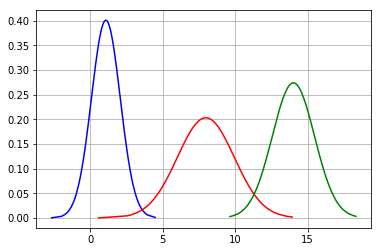

In [2]:
#Distributions generated using the given parameters
dist_1 = np.random.normal(1,1,1000)
dist_2 = np.random.normal(8,2,1000)
dist_3 = np.random.normal(14,1.5,1000)

#Visualization of the generated distributions
dist_1.sort()
dist_2.sort()
dist_3.sort()
plt.plot(dist_1, stats.norm.pdf(dist_1, np.mean(dist_1), np.std(dist_1)), 'b')
plt.plot(dist_2, stats.norm.pdf(dist_2, np.mean(dist_2), np.std(dist_2)), 'r')
plt.plot(dist_3, stats.norm.pdf(dist_3, np.mean(dist_3), np.std(dist_3)), 'g')
plt.grid()
plt.show()

#Getting samples
samples = mixture_rvs([.33,.33, .34], size=1000, dist=[stats.norm, stats.norm, stats.norm],\
            kwargs = (dict(loc=1,scale=1),dict(loc=8,scale=2),dict(loc=14,scale=1.5)))

#Plot of the samples obtained from the distributions.
#samples.sort()
#plt.plot(samples, stats.norm.pdf(samples, np.mean(samples), np.std(samples)))
#plt.show()

In [20]:
#generate 1000 points for evaluating KDE's
x_vals = np.linspace(0, 20, 1000)

#Evaluating scipy_kde
scipy_kde = gaussian_kde(samples, bw_method=0.2/ samples.std(ddof=1))
pdf1 = scipy_kde.evaluate(x_vals)

#Evaluating KDE Univariate
univarate_kde = KDEUnivariate(samples)
univarate_kde.fit(bw=0.2)
pdf2 = univarate_kde.evaluate(x_vals)

#Evaluating KDE Multivariate
multi_kde = KDEMultivariate(samples, bw=0.2,var_type='c')
pdf3 = multi_kde.pdf(x_vals)

#Evaluating KDE Scikit_learn
scikit_kde = KernelDensity(bandwidth=0.2, kernel='gaussian')
scikit_kde.fit(samples[:, None])

# score_samples() returns the log-likelihood of the samples
log_pdf = scikit_kde.score_samples(x_vals[:, None])
pdf4 = np.exp(log_pdf)

cmb_pdfs = [pdf1,pdf2,pdf3,pdf4]

/home/kramer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


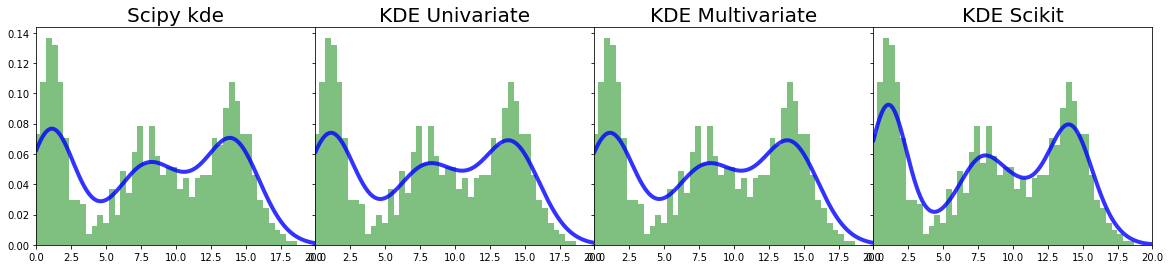

In [21]:
#Nice plots
fig, ax = plt.subplots(1,4, sharey=True, figsize=(20,4))

fig.subplots_adjust(wspace=0)
titles = ['Scipy kde', 'KDE Univariate', 'KDE Multivariate', 'KDE Scikit']
for i in range(4):
    pdf = cmb_pdfs[i]
    ax[i].plot(x_vals, pdf, color = 'blue', alpha = 0.8, lw = 4)
    ax[i].hist(samples, bins=50, normed=True, color='green', alpha=0.5)
    ax[i].set_title(titles[i], fontsize=20)
    ax[i].set_xlim(0, 20)
plt.show()